## Import data science libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Set the default font to Arial
plt.rcParams['font.family'] = 'Arial'

## Import data from .csv

In [2]:
df = pd.read_csv('HTA_pCPA_Listing Metrics 2023.csv', encoding='iso-8859-1')

## Custom colour palette

In [3]:
# Define a custom color palette
custom_palette = sns.color_palette("pastel")

## Display the first 5 rows of the DataFrame

In [4]:
df.head()

,Trade_Name\n,Chemical,Manufacturer,Top_15_Brand_Corporation,Biologic_(by_Product),Biosimilar,NAS,Oncology,Rare_Disease_(FDA),Rare_Disease_(EMA),...,NOC_to_CADTH_Rec,NOC_to_INESSS_Rec,CADTH_Rec_to_pCPA_Decision,INESSS_Rec_to_pCPA_Decision,NOC_to_80%_Listing,First_Provincial_Listing_to_80%_Listing_(incl_QC),First_Provincial_Listing_to_80%_Listing_(excl_QC),First_Provincial_Listing_to_50%_Listing_(incl_QC),50%_Listing_to_80%_Listing,HC_Sub_to_CADTH_Rec
0,Abecma,idecabtagene vicleucel,Celgene,Y,N,N,Y,Y,Y,Y,...,170.0,98.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,407
1,Abilify (MDD),aripiprazole,Bristol-Myers Squibb,Y,N,N,N,N,N,N,...,511.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41934
2,Abilify Maintena,aripiprazole,Otsuka Pharmaceutical & Lundbeck,N,N,N,N,N,N,N,...,312.0,233.0,177.0,256.0,547.0,314.0,41.0,301.0,13.0,41992
3,Abraxane,nab paclitaxel,Celgene,N,N,N,N,Y,Y,N,...,69.0,201.0,160.0,28.0,492.0,384.0,384.0,167.0,217.0,41905
4,Actemra,tocilizumab,Hoffmann-La Roche Ltd.,Y,Y,N,N,N,N,N,...,151.0,222.0,254.0,183.0,705.0,215.0,215.0,47.0,168.0,330


## IMC 1: Overall Time-to-Listing Chart

In [5]:
### Convert First_Prov_Listing_(inc_QC) column to date-time ###

# Convert First_Prov_Listing_(inc_QC) column to datetime
df['First_Prov_Listing_(inc_QC)'] = pd.to_datetime(df['First_Prov_Listing_(inc_QC)'])

# Extract the date component using the .dt accessor
date_component = df['First_Prov_Listing_(inc_QC)'].dt.date

print("Date component as date objects:")
print(date_component)

Date component as date objects:
0             NaT
1      2012-01-01
2      2014-10-01
3      2014-11-01
4      2019-03-01
          ...    
748    2018-07-05
749           NaT
750    2012-02-01
751    2021-09-01
752    2021-09-01
Name: First_Prov_Listing_(inc_QC), Length: 753, dtype: object


C:\Users\mesic\AppData\Local\Temp\ipykernel_15508\717761112.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['First_Prov_Listing_(inc_QC)'] = pd.to_datetime(df['First_Prov_Listing_(inc_QC)'])


## Filter the DataFrame to include

In [6]:
# - only dates from 2018 to 2022 
# - only NAS = 'Y'
# - pCPA Negotiation is not “2nd”
# - CADTH Submission Type – Agency Specific as not “Reassessment”, “Request for Advice”, or “Resubmission”

df_filtered = df[
    (df['First_Prov_Listing_(inc_QC)'].dt.year.isin([2018,2019,2020,2021,2022])) &
    (df['NAS'] == 'Y') &
    (df['pCPA_Negotiation'] != '2nd') &
    (~df['CADTH_Submission_Type_-_Agency_Specific'].isin(['Reassessment', 'Request for Advice', 'Resubmission']))
]

## Create new dataframe with only columns of interest

In [7]:
columns_to_keep = [
    'First_Prov_Listing_(inc_QC)',
    'NOC_to_CADTH_Submission',
    'CADTH_Duration',
    'CADTH_to_pCPA_Initiation',
    'pCPA_LOI_to_LOE',
    'pCPA_Completion_to_1st_Listing_(incl_QC)',
    'First_Provincial_Listing_to_50%_Listing_(incl_QC)'
]

df_new = df_filtered[columns_to_keep].copy()
df_new

,First_Prov_Listing_(inc_QC),NOC_to_CADTH_Submission,CADTH_Duration,CADTH_to_pCPA_Initiation,pCPA_LOI_to_LOE,pCPA_Completion_to_1st_Listing_(incl_QC),First_Provincial_Listing_to_50%_Listing_(incl_QC)
19,2019-12-20,4.0,178.0,155.0,573.0,29.0,851.0
29,2022-02-01,55.0,294.0,114.0,140.0,60.0,56.0
30,2019-06-28,71.0,194.0,91.0,217.0,65.0,6.0
57,2019-02-14,-69.0,162.0,117.0,185.0,28.0,63.0
61,2021-12-16,-168.0,238.0,341.0,126.0,107.0,NaN
...,...,...,...,...,...,...,...
697,2019-12-20,-34.0,243.0,37.0,82.0,30.0,224.0
733,2021-09-29,225.0,209.0,71.0,271.0,49.0,63.0
742,2019-11-14,-92.0,NaN,NaN,169.0,78.0,NaN
743,2021-10-20,-203.0,302.0,-33.0,231.0,12.0,9.0


## Group by year and calculate the averages for all columns

In [32]:
averages_by_year = df_new.groupby(df_new['First_Prov_Listing_(inc_QC)'].dt.year).mean()
averages_by_year = averages_by_year.drop(['First_Prov_Listing_(inc_QC)'],axis=1)
averages_by_year

,NOC_to_CADTH_Submission,CADTH_Duration,CADTH_to_pCPA_Initiation,pCPA_LOI_to_LOE,pCPA_Completion_to_1st_Listing_(incl_QC),First_Provincial_Listing_to_50%_Listing_(incl_QC)
First_Prov_Listing_(inc_QC),,,,,,
2018,69.481481,223.888889,140.444444,243.920000,-22.040000,172.095238
2019,-14.586207,206.750000,124.142857,181.172414,51.310345,131.000000
2020,-60.500000,244.300000,74.700000,165.818182,99.181818,75.600000
2021,115.947368,283.052632,127.210526,262.947368,38.157895,74.058824
2022,108.894737,246.157895,172.473684,188.736842,19.000000,90.333333


In [33]:
# Export to .csv
averages_by_year.to_csv('averages_by_year_data.csv', index=True)

## Overall Time-to-Listing Chart

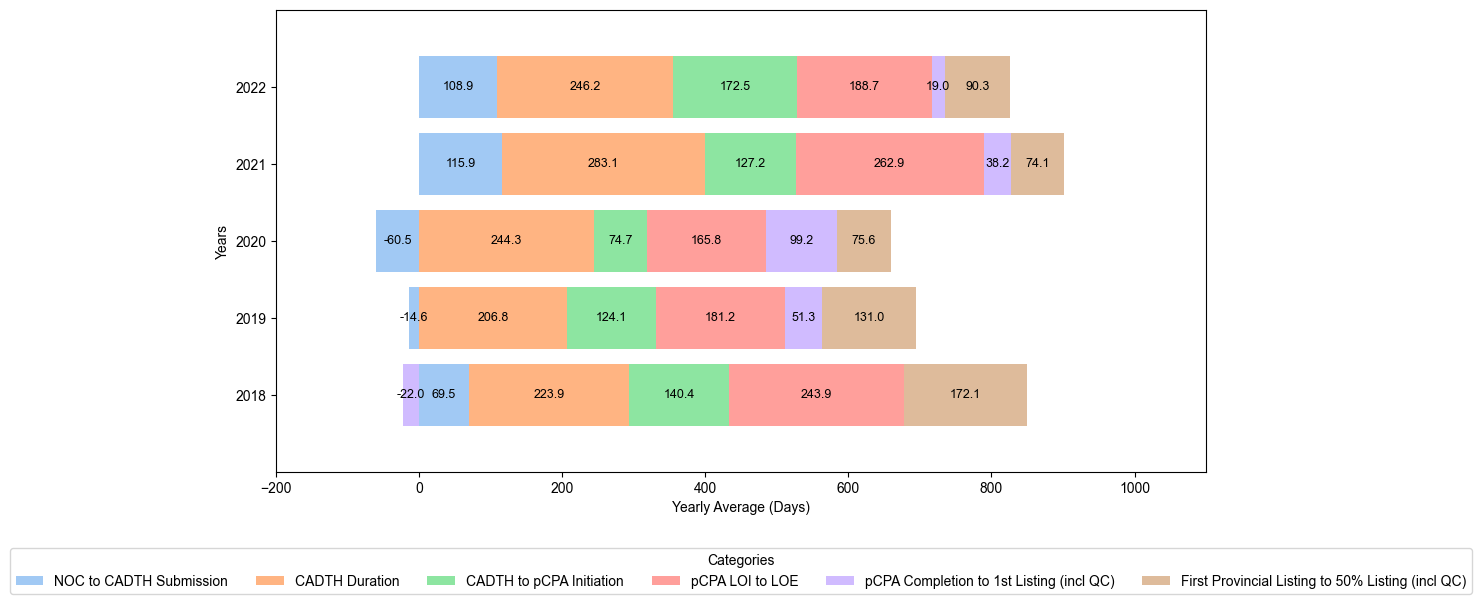

In [41]:
# Sample data and other code
years = [2018, 2019, 2020, 2021, 2022]
categories = [
    'NOC_to_CADTH_Submission',
    'CADTH_Duration',
    'CADTH_to_pCPA_Initiation',
    'pCPA_LOI_to_LOE',
    'pCPA_Completion_to_1st_Listing_(incl_QC)',
    'First_Provincial_Listing_to_50%_Listing_(incl_QC)'
]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Initialize the "left" value for stacking
left_positive = np.zeros(len(years))
left_negative = np.zeros(len(years))

# Iterate through categories
for i, category in enumerate(categories):
    # Separate positive and negative values
    positive_values = averages_by_year[category].apply(lambda x: max(x, 0))
    negative_values = averages_by_year[category].apply(lambda x: min(x, 0))
    
    # Plot positive values
    pos_bars = ax.barh(years, positive_values, label=category, color=custom_palette[i], left=left_positive)
    
    # Plot negative values to the left of zero
    neg_bars = ax.barh(years, negative_values, label=None, color=custom_palette[i], left=left_negative)
    
    # Add data labels to positive bars
    for bar, value in zip(pos_bars, positive_values):
        if value > 0:
            ax.text(bar.get_x() + bar.get_width() / 2, bar.get_y() + bar.get_height() / 2, f'{value:.1f}',
                    va='center', ha='center', color='black', fontsize=9)

    # Add data labels to negative bars
    for bar, value in zip(neg_bars, negative_values):
        if value < 0:
            ax.text(bar.get_x() + bar.get_width() / 2, bar.get_y() + bar.get_height() / 2, f'{value:.1f}',
                    va='center', ha='center', color='black', fontsize=9)

    # Update the "left" values for the next category
    left_positive += positive_values
    left_negative += negative_values
    
# Add labels and legend, customize
ax.set_xlabel('Yearly Average (Days)')
ax.set_ylabel('Years')
ax.set_ylim(years[-1] + 1, years[0] - 1)  # Adjust ylim for proper alignment
ax.set_xlim(-200, 1100)

# Adjust ylim for proper alignment with reversed years
ax.set_ylim(years[0] - 1, years[-1] + 1)

# Set yticks to only include the years you want to display
ax.set_yticks([year for year in years if year not in [2017, 2023]])

# Create a list of legend handles with modified labels
handles, labels = ax.get_legend_handles_labels()
labels = [label.replace('_', ' ') for label in labels]  # Remove underscores from labels

# Show the legend with custom handles and modified labels
ax.legend(handles, labels, title='Categories', loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=len(categories))

# Save the figure as a PNG file
plt.savefig('overall_time_to_listing.png', bbox_inches='tight')

# Show the plot
plt.show()

## IMC 2: Provincial Listing Data

In [11]:
# Convert listing columns to datetime

df['Listing_BC_Date'] = pd.to_datetime(df['Listing_BC_Date'])
df['Listing_AB_Date'] = pd.to_datetime(df['Listing_AB_Date'])
df['Listing_SK_Date'] = pd.to_datetime(df['Listing_SK_Date'])
df['Listing_MB_Date'] = pd.to_datetime(df['Listing_MB_Date'])
df['Listing_ON_Date'] = pd.to_datetime(df['Listing_ON_Date'])
df['Listing_NB_Date'] = pd.to_datetime(df['Listing_NB_Date'])
df['Listing_NS_Date'] = pd.to_datetime(df['Listing_NS_Date'])
df['Listing_PEI_Date'] = pd.to_datetime(df['Listing_PEI_Date'])
df['Listing_NL_Date'] = pd.to_datetime(df['Listing_NL_Date'])
df['Listing_QC_Date'] = pd.to_datetime(df['Listing_QC_Date'])

# Filter the DataFrame to include:

# - Only dates from 2016- 2022
# - "CADTH Submission Type – Agency Specific” is not “Non-sponsored Submission”, “Reassessment”, “Request for Advice”, or “Resubmission”
# “pCPA Negotiation” is not “2nd”


df_prov_filtered = df[
    (df['Listing_BC_Date'].dt.year.isin([2016,2017,2018,2019,2020,2021,2022])) |
    (df['Listing_AB_Date'].dt.year.isin([2016,2017,2018,2019,2020,2021,2022])) |
    (df['Listing_SK_Date'].dt.year.isin([2016,2017,2018,2019,2020,2021,2022])) |
    (df['Listing_MB_Date'].dt.year.isin([2016,2017,2018,2019,2020,2021,2022])) |
    (df['Listing_ON_Date'].dt.year.isin([2016,2017,2018,2019,2020,2021,2022])) |
    (df['Listing_NB_Date'].dt.year.isin([2016,2017,2018,2019,2020,2021,2022])) |
    (df['Listing_NS_Date'].dt.year.isin([2016,2017,2018,2019,2020,2021,2022])) |
    (df['Listing_PEI_Date'].dt.year.isin([2016,2017,2018,2019,2020,2021,2022])) |
    (df['Listing_NL_Date'].dt.year.isin([2016,2017,2018,2019,2020,2021,2022])) |
    (df['Listing_QC_Date'].dt.year.isin([2016,2017,2018,2019,2020,2021,2022])) &
    (~df['pCPA_Negotiation'].isin(['2nd'])) &
    (~df['CADTH_Submission_Type_-_Agency_Specific'].isin(['Non-sponsored Submission','Reassessment', 'Request for Advice', 'Resubmission']))
]

df_prov_filtered.to_csv('provincial_filtered_data.csv')

C:\Users\mesic\AppData\Local\Temp\ipykernel_15508\4246089639.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Listing_BC_Date'] = pd.to_datetime(df['Listing_BC_Date'])
C:\Users\mesic\AppData\Local\Temp\ipykernel_15508\4246089639.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Listing_AB_Date'] = pd.to_datetime(df['Listing_AB_Date'])
C:\Users\mesic\AppData\Local\Temp\ipykernel_15508\4246089639.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Listing_SK_Date'] = pd.to_datetime(df['Listing_SK_Date'])
C:\Users\mesic\AppData\Local\Temp\ipykernel_15508\42460

## Create new dataframe with only columns of interest

In [12]:
columns_to_keep = ['Listing_BC_Date',
                   'Listing_AB_Date',
                   'Listing_SK_Date',
                   'Listing_MB_Date',
                   'Listing_ON_Date',
                   'Listing_NB_Date',
                   'Listing_NS_Date',
                   'Listing_PEI_Date',
                   'Listing_NL_Date',
                   'Listing_QC_Date',
                   'pCPA_to_Listing_BC_Date',
                   'pCPA_to_Listing_AB_Date',
                   'pCPA_to_Listing_SK_Date',
                   'pCPA_to_Listing_MB_Date',
                   'pCPA_to_Listing_ON_Date',
                   'pCPA_to_Listing_NB_Date',
                   'pCPA_to_Listing_NS_Date',
                   'pCPA_to_Listing_PEI_Date',
                   'pCPA_to_Listing_NL_Date',
                   'pCPA_to_Listing_QC_Date',
                  ]

df_new_2 = df_prov_filtered[columns_to_keep].copy()
df_new_2

,Listing_BC_Date,Listing_AB_Date,Listing_SK_Date,Listing_MB_Date,Listing_ON_Date,Listing_NB_Date,Listing_NS_Date,Listing_PEI_Date,Listing_NL_Date,Listing_QC_Date,pCPA_to_Listing_BC_Date,pCPA_to_Listing_AB_Date,pCPA_to_Listing_SK_Date,pCPA_to_Listing_MB_Date,pCPA_to_Listing_ON_Date,pCPA_to_Listing_NB_Date,pCPA_to_Listing_NS_Date,pCPA_to_Listing_PEI_Date,pCPA_to_Listing_NL_Date,pCPA_to_Listing_QC_Date
1,NaT,2012-01-01,NaT,2012-05-24,NaT,2020-06-18,2021-08-01,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-08-11,2015-09-01,2015-07-01,2015-10-22,2015-07-29,2015-10-14,2015-09-01,2016-04-25,2015-08-01,2014-10-01,58.0,79.0,17.0,130.0,45.0,122.0,79.0,316.0,48.0,-256.0
3,2014-11-01,2015-03-30,2015-05-01,2015-04-20,2015-04-17,2015-07-15,2015-04-01,2018-08-01,2015-09-01,2015-11-20,-121.0,28.0,60.0,49.0,46.0,135.0,30.0,1248.0,183.0,263.0
4,2019-03-12,2019-03-01,2019-05-01,2019-05-31,2019-04-17,2020-10-22,NaT,2022-02-28,2020-06-15,2019-10-02,96.0,85.0,146.0,176.0,132.0,686.0,NaN,1180.0,557.0,300.0
5,2013-04-11,2012-11-01,2013-01-01,2013-07-17,NaT,2013-02-14,2013-02-01,2013-10-01,2016-07-01,2012-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,2017-08-01,2016-10-18,2016-08-08,2016-10-20,2016-10-19,2016-12-21,2017-05-01,NaT,2017-01-01,2016-11-15,424.0,137.0,66.0,139.0,138.0,201.0,332.0,NaN,212.0,165.0
747,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2018-07-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
748,2018-09-01,2018-10-30,2018-08-15,2018-07-19,2018-10-11,2018-11-30,2019-10-03,2022-09-26,NaT,2018-07-05,165.0,224.0,148.0,121.0,205.0,255.0,562.0,1651.0,NaN,107.0
751,2021-09-01,2021-11-30,2021-11-01,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Apply group by filters

In [13]:
# Group by year and calculate the averages for respective columns

average_BC_year = df_new_2['pCPA_to_Listing_BC_Date'].groupby(df_new_2['Listing_BC_Date'].dt.year).mean()
average_AB_year = df_new_2['pCPA_to_Listing_AB_Date'].groupby(df_new_2['Listing_AB_Date'].dt.year).mean()
average_SK_year = df_new_2['pCPA_to_Listing_SK_Date'].groupby(df_new_2['Listing_SK_Date'].dt.year).mean()
average_MB_year = df_new_2['pCPA_to_Listing_MB_Date'].groupby(df_new_2['Listing_MB_Date'].dt.year).mean()
average_ON_year = df_new_2['pCPA_to_Listing_ON_Date'].groupby(df_new_2['Listing_ON_Date'].dt.year).mean()
average_NB_year = df_new_2['pCPA_to_Listing_NB_Date'].groupby(df_new_2['Listing_NB_Date'].dt.year).mean()
average_NS_year = df_new_2['pCPA_to_Listing_NS_Date'].groupby(df_new_2['Listing_NS_Date'].dt.year).mean()
average_PEI_year = df_new_2['pCPA_to_Listing_PEI_Date'].groupby(df_new_2['Listing_PEI_Date'].dt.year).mean()
average_NL_year = df_new_2['pCPA_to_Listing_NL_Date'].groupby(df_new_2['Listing_NL_Date'].dt.year).mean()
average_QC_year = df_new_2['pCPA_to_Listing_QC_Date'].groupby(df_new_2['Listing_QC_Date'].dt.year).mean()

# Group by year and calculate the counts for respective columns

count_BC_year = df_new_2['pCPA_to_Listing_BC_Date'].groupby(df_new_2['Listing_BC_Date'].dt.year).count()
count_AB_year = df_new_2['pCPA_to_Listing_AB_Date'].groupby(df_new_2['Listing_AB_Date'].dt.year).count()
count_SK_year = df_new_2['pCPA_to_Listing_SK_Date'].groupby(df_new_2['Listing_SK_Date'].dt.year).count()
count_MB_year = df_new_2['pCPA_to_Listing_MB_Date'].groupby(df_new_2['Listing_MB_Date'].dt.year).count()
count_ON_year = df_new_2['pCPA_to_Listing_ON_Date'].groupby(df_new_2['Listing_ON_Date'].dt.year).count()
count_NB_year = df_new_2['pCPA_to_Listing_NB_Date'].groupby(df_new_2['Listing_NB_Date'].dt.year).count()
count_NS_year = df_new_2['pCPA_to_Listing_NS_Date'].groupby(df_new_2['Listing_NS_Date'].dt.year).count()
count_PEI_year = df_new_2['pCPA_to_Listing_PEI_Date'].groupby(df_new_2['Listing_PEI_Date'].dt.year).count()
count_NL_year = df_new_2['pCPA_to_Listing_NL_Date'].groupby(df_new_2['Listing_NL_Date'].dt.year).count()
count_QC_year = df_new_2['pCPA_to_Listing_QC_Date'].groupby(df_new_2['Listing_QC_Date'].dt.year).count()

## Create and export DataFrames for average and count data

In [14]:
average_data = pd.DataFrame({
    'BC': average_BC_year,
    'AB': average_AB_year,
    'SK': average_SK_year,
    'MB': average_MB_year,
    'ON': average_ON_year,
    'NB': average_NB_year,
    'NS': average_NS_year,
    'PEI': average_PEI_year,
    'NL': average_NL_year,
    'QC': average_QC_year
})

count_data = pd.DataFrame({
    'BC': count_BC_year,
    'AB': count_AB_year,
    'SK': count_SK_year,
    'MB': count_MB_year,
    'ON': count_ON_year,
    'NB': count_NB_year,
    'NS': count_NS_year,
    'PEI': count_PEI_year,
    'NL': count_NL_year,
    'QC': count_QC_year
})

# Export DataFrames to CSV files
average_data.to_csv('average_provincial_data.csv')
count_data.to_csv('count_provincial_data.csv')

## Provincial Listing Data 

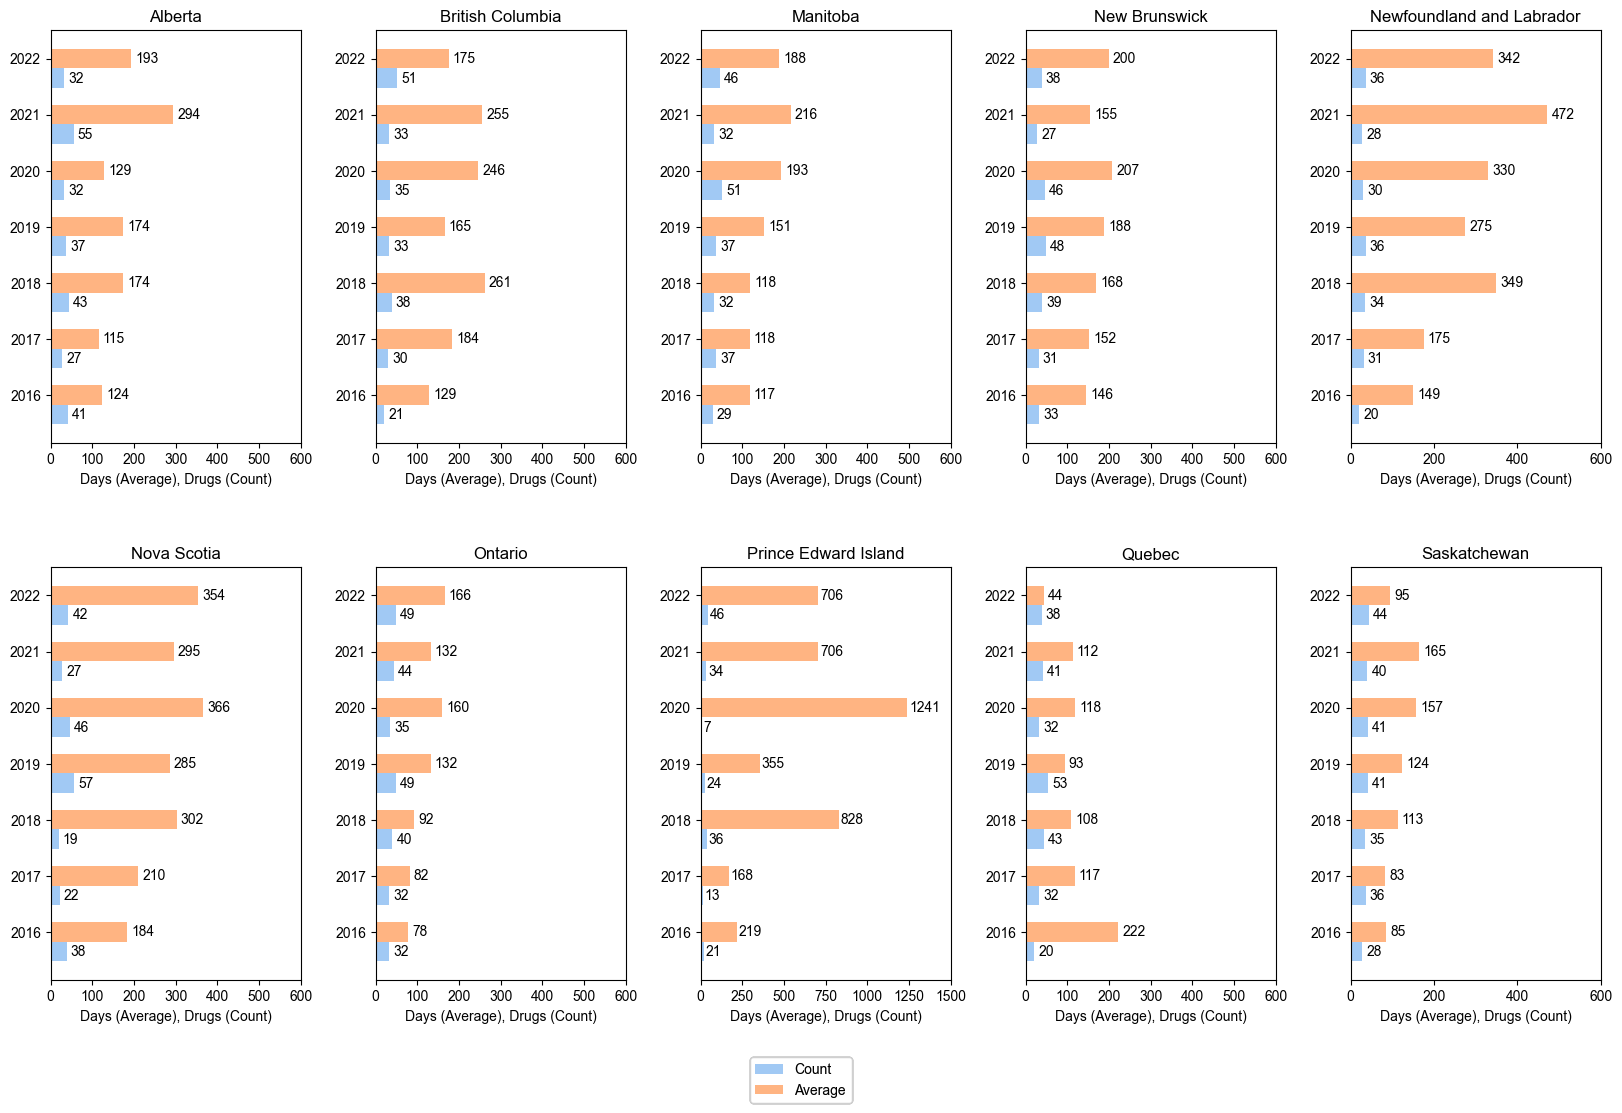

In [15]:
# Calculate the unique years from DataFrame
unique_years = df_new_2['Listing_AB_Date'].dt.year.unique()

# Filter unique_years for the range 2016-2022
filtered_unique_years = [year for year in unique_years if 2016 <= year <= 2022]

# Dictionary of province names and their corresponding data

province_data = {
    'Alberta': {
        'average': average_AB_year,
        'count': count_AB_year,
        'unique_years': unique_years
    },
    'British Columbia': {
        'average': average_BC_year,
        'count': count_BC_year,
        'unique_years': unique_years
    },
      'Manitoba': {
        'average': average_MB_year,
        'count': count_MB_year,
        'unique_years': unique_years
    },
      'New Brunswick': {
        'average': average_NB_year,
        'count': count_NB_year,
        'unique_years': unique_years
    },
      'Newfoundland and Labrador': {
        'average': average_NL_year,
        'count': count_NL_year,
        'unique_years': unique_years
    },
      'Nova Scotia': {
        'average': average_NS_year,
        'count': count_NS_year,
        'unique_years': unique_years
    },
      'Ontario': {
        'average': average_ON_year,
        'count': count_ON_year,
        'unique_years': unique_years
    },
      'Prince Edward Island': {
        'average': average_PEI_year,
        'count': count_PEI_year,
        'unique_years': unique_years
    },
        'Quebec': {
        'average': average_QC_year,
        'count': count_QC_year,
        'unique_years': unique_years
    },
      'Saskatchewan': {
        'average': average_SK_year,
        'count': count_SK_year,
        'unique_years': unique_years
    },
}

# Create a 2x5 grid for the subplots
fig, axs = plt.subplots(2, 5, figsize=(20, 10))
axs = axs.ravel()  # Flatten the 2D array for easier indexing

# Adjust the bar margin
bar_margin = 0.3

# Loop through each province's data and create a subplot
for i, (province, data) in enumerate(province_data.items()):
    average_province_year = data['average']
    count_province_year = data['count']
    unique_years = data['unique_years']
    
     # Filter data for years 2016-2022
    average_province_year = average_province_year[filtered_unique_years]
    count_province_year = count_province_year[filtered_unique_years]
    unique_years = filtered_unique_years
    
    # Sort the years in ascending order
    unique_years.sort()  # Add this line
    
    # Calculate adjusted bar width based on bar margin
    num_years = len(unique_years)
    total_bar_width = 1.0 - bar_margin
    bar_width = total_bar_width / 2
    
    # Calculate bar positions
    left_positions = np.arange(num_years) - bar_width
    right_positions = np.arange(num_years)
    
    # Create the clustered bar chart
    ax = axs[i]
    bars1 = ax.barh(left_positions, count_province_year, height=bar_width, color=custom_palette[0], label='Count')
    bars2 = ax.barh(right_positions, average_province_year, height=bar_width, color=custom_palette[1], label='Average')

 # Set the y-axis tick labels using sorted unique_years
    ax.set_yticks(np.arange(num_years))
    ax.set_yticklabels([str(year).replace('.0', '') for year in unique_years])
    ax.set_xlabel('Days (Average), Drugs (Count)')
    ax.set_title(province)
    
    if province != 'Prince Edward Island':     
        ax.set_xlim(0, 600)
    else:
        ax.set_xlim(0,1500)
    
    # Add rounded data labels to the bars
    for bar in bars1:
        xval = bar.get_width()
        ax.text(xval + 10, bar.get_y() + bar.get_height()/2, str(int(xval)), va='center')
        
    for bar in bars2:
        xval = bar.get_width()
        ax.text(xval + 10, bar.get_y() + bar.get_height()/2, f'{xval:.0f}', va='center')  # Rounded to 0 decimal places
    
    # Adjust spacing between bars and axis
    ax.margins(x=bar_margin)

    # Create a single legend
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.1))

    # Adjust spacing between subplots and titles
    plt.subplots_adjust(hspace=0.3, wspace=0.3, top=0.98, bottom=0.03)

# Save the plot as a PNG file
plt.savefig('province_graphs.png', bbox_inches='tight')

# Show the plot
plt.show()

## Provincial Listing Data: Aggregate Chart

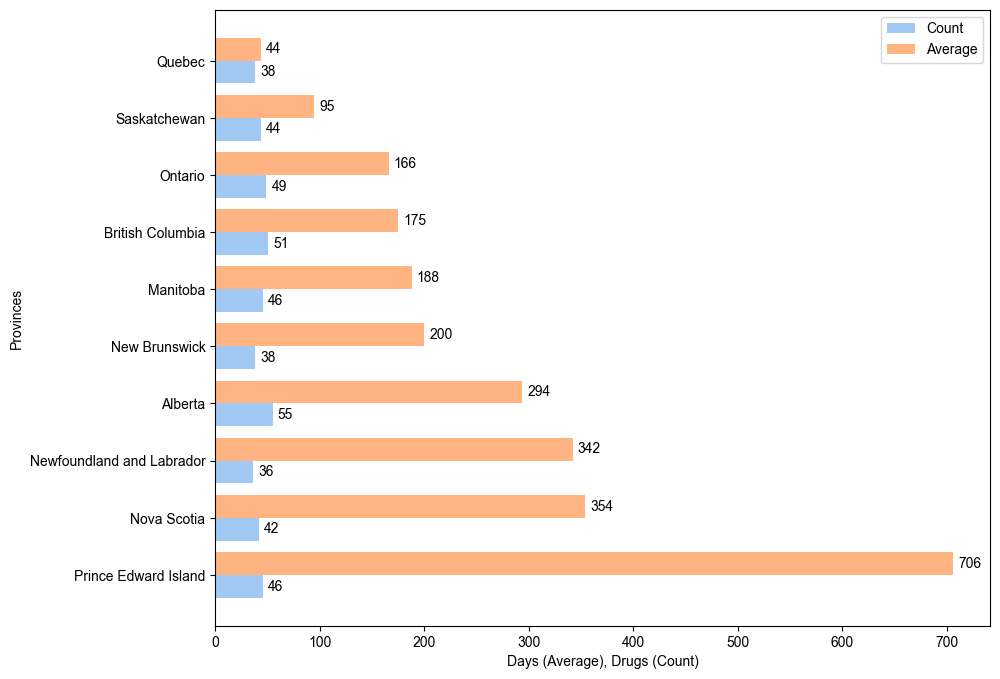

In [16]:
# Create a figure for the clustered bar plot
fig, ax = plt.subplots(figsize=(10, 8))

# Filter data for the year 2022
year_filter = 2022

# Create lists to store data
count_values = []
average_values = []

# Loop through each province's data and extract values for the specified year
for province, data in province_data.items():
    count_province_year = data['count']
    average_province_year = data['average']
    
    # Get values for the specified year
    count_value = count_province_year.get(year_filter, 0)
    average_value = average_province_year.get(year_filter, 0)
    
    # Append values to lists
    count_values.append(count_value)
    average_values.append(average_value)

# Organize province names and values in descending order of average
sorted_indices = sorted(range(len(average_values)), key=lambda k: average_values[k], reverse=True)
sorted_provinces = [list(province_data.keys())[i] for i in sorted_indices]
sorted_count_values = [count_values[i] for i in sorted_indices]
sorted_average_values = [round(average_values[i]) for i in sorted_indices]

# Set bar width
bar_width = 0.4
bar_positions = np.arange(len(province_data))

# Create the clustered bar chart for 2022
ax.barh(bar_positions - bar_width/2, sorted_count_values, height=bar_width, color=custom_palette[0], label='Count')
ax.barh(bar_positions + bar_width/2, sorted_average_values, height=bar_width, color=custom_palette[1], label='Average')

# Set y-axis labels to province names
ax.set_yticks(bar_positions)
ax.set_yticklabels(sorted_provinces)  # Use the sorted_provinces list here

# Set labels and title
ax.set_xlabel('Days (Average), Drugs (Count)')
ax.set_ylabel('Provinces')

# Add data labels to the bars
for i, (count, average) in enumerate(zip(sorted_count_values, sorted_average_values)):
    ax.text(count + 5, i - bar_width/2, str(count), va='center', color='black')
    ax.text(average + 5, i + bar_width/2, str(average), va='center', color='black')

# Create a single legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, loc='upper right')

# Save the plot as a PNG file
plt.savefig('2022_chart.png', bbox_inches='tight')

# Show the plot
plt.show()

## IMC 3: DRD listing time

In [17]:
# Convert First_Prov_Listing_(inc_QC) column to datetime
df['First_Prov_Listing_(inc_QC)'] = pd.to_datetime(df['First_Prov_Listing_(inc_QC)'])

# Extract the date component using the .dt accessor
date_component = df['First_Prov_Listing_(inc_QC)'].dt.date

print("Date component as date objects:")
print(date_component)

Date component as date objects:
0             NaT
1      2012-01-01
2      2014-10-01
3      2014-11-01
4      2019-03-01
          ...    
748    2018-07-05
749           NaT
750    2012-02-01
751    2021-09-01
752    2021-09-01
Name: First_Prov_Listing_(inc_QC), Length: 753, dtype: object


## Filter the DataFrame to include

In [18]:
# - only dates from 2018 to 2022 
# - only NAS = 'Y'
# - pCPA Negotiation is not “2nd”
# - CADTH Submission Type – Agency Specific as not “Reassessment”, “Request for Advice”, or “Resubmission”

df_filtered_2 = df[
    (df['First_Prov_Listing_(inc_QC)'].dt.year.isin([2018,2019,2020,2021,2022])) &
    (df['pCPA_Negotiation'] != '2nd') &
    (~df['CADTH_Submission_Type_-_Agency_Specific'].isin(['Reassessment', 'Request for Advice', 'Resubmission']))
     ]

## Create new dataframe with only columns of interest

In [19]:
columns_to_keep = [
    'First_Prov_Listing_(inc_QC)',
    'NOC_to_CADTH_Submission',
    'CADTH_Duration',
    'CADTH_to_pCPA_Initiation',
    'pCPA_LOI_to_LOE',
    'pCPA_Completion_to_1st_Listing_(incl_QC)',
    'First_Provincial_Listing_to_50%_Listing_(incl_QC)',
    'Rare_Disease_(FDA_or_EMA)'
]

drd_listing_data = df_filtered_2[columns_to_keep].copy()
drd_listing_data

,First_Prov_Listing_(inc_QC),NOC_to_CADTH_Submission,CADTH_Duration,CADTH_to_pCPA_Initiation,pCPA_LOI_to_LOE,pCPA_Completion_to_1st_Listing_(incl_QC),First_Provincial_Listing_to_50%_Listing_(incl_QC),Rare_Disease_(FDA_or_EMA)
4,2019-03-01,-32.0,183.0,121.0,133.0,85.0,47.0,N
8,2018-10-31,369.0,203.0,338.0,180.0,70.0,152.0,N
13,2020-11-11,-45.0,240.0,29.0,80.0,51.0,51.0,Y
14,2021-07-01,465.0,248.0,64.0,82.0,64.0,48.0,Y
15,2021-07-31,336.0,245.0,64.0,82.0,94.0,18.0,Y
...,...,...,...,...,...,...,...,...
734,2021-09-29,-11.0,220.0,33.0,71.0,49.0,63.0,Y
742,2019-11-14,-92.0,NaN,NaN,169.0,78.0,NaN,N
743,2021-10-20,-203.0,302.0,-33.0,231.0,12.0,9.0,Y
747,2018-07-05,70.0,181.0,64.0,NaN,NaN,NaN,Y


## Export DataFrames to CSV files

In [20]:
drd_listing_data.to_csv('drd_listing_data.csv')

## Create two dataframes with Rare_Disease_(FDA_or_EMA) = 'Y' and Rare_Disease_(FDA_or_EMA) = 'N'

In [21]:
# Filter data for Rare_Disease_(FDA_or_EMA) = 'Y'
data_rd1 = drd_listing_data[drd_listing_data['Rare_Disease_(FDA_or_EMA)'] == 'Y']

# Drop unnecessary columns
averages_by_year_rd1 = data_rd1.drop(['Rare_Disease_(FDA_or_EMA)'], axis=1)

# Calculate average for each year
averages_by_year_rd1 = averages_by_year_rd1.groupby(data_rd1['First_Prov_Listing_(inc_QC)'].dt.year).mean()

# Filter data for Rare_Disease_(FDA_or_EMA) = 'N'
data_rd2 = drd_listing_data[drd_listing_data['Rare_Disease_(FDA_or_EMA)'] == 'N']

# Drop unnecessary columns
averages_by_year_rd2 = data_rd2.drop(['Rare_Disease_(FDA_or_EMA)'], axis=1)

# Calculate average for each year
averages_by_year_rd2 = averages_by_year_rd2.groupby(data_rd2['First_Prov_Listing_(inc_QC)'].dt.year).mean()

## DRD Listing Time

C:\Users\mesic\AppData\Local\Temp\ipykernel_15508\1245214086.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('Paired')


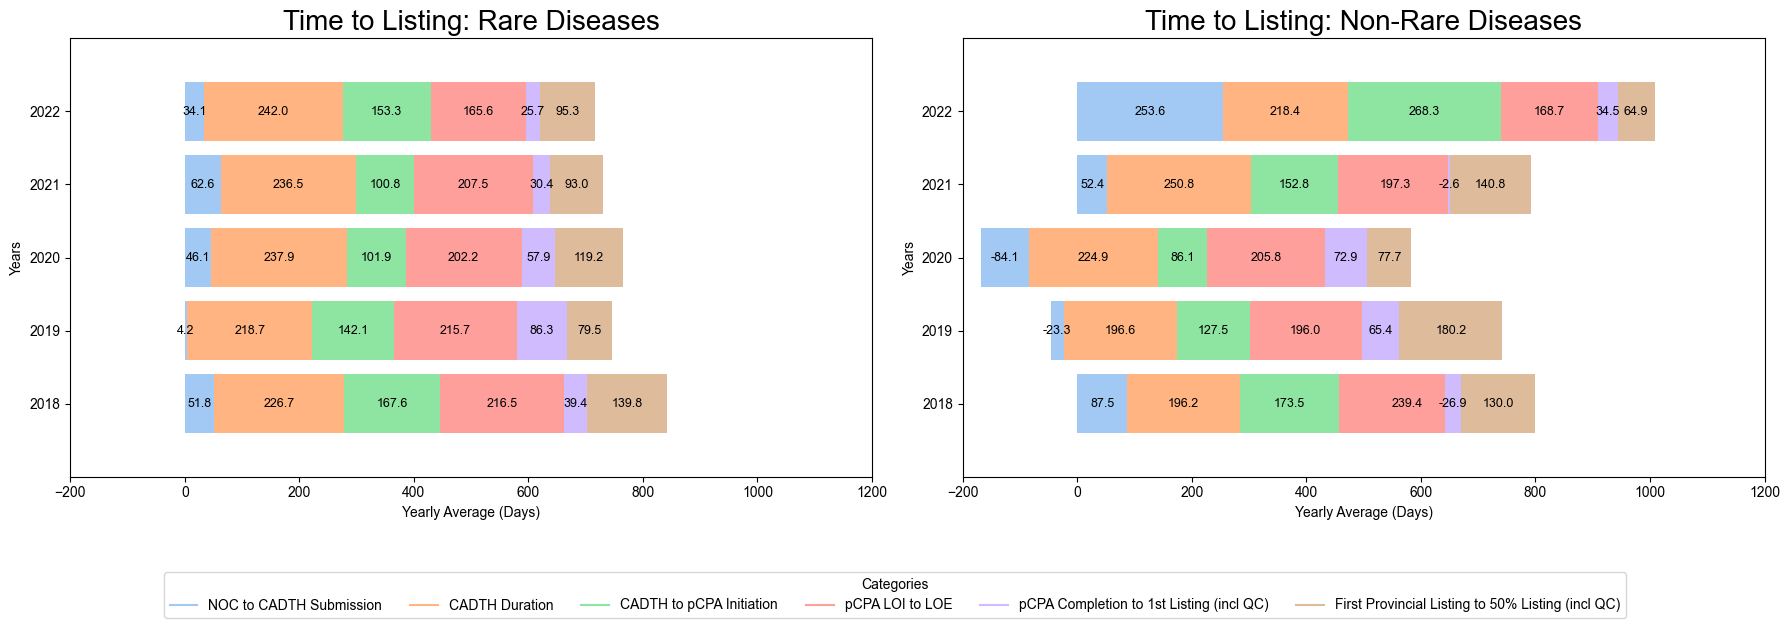

In [22]:
# Data
years = [2018, 2019, 2020, 2021, 2022]
categories = [
    'NOC_to_CADTH_Submission',
    'CADTH_Duration',
    'CADTH_to_pCPA_Initiation',
    'pCPA_LOI_to_LOE',
    'pCPA_Completion_to_1st_Listing_(incl_QC)',
    'First_Provincial_Listing_to_50%_Listing_(incl_QC)',
]

# Set up color map for categories
colors = plt.cm.get_cmap('Paired')

# Create a figure and axes for both graphs side by side
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Adjust titles for left and right charts
axes[0].set_title("Time to Listing: Rare Diseases", fontsize=20)
axes[1].set_title("Time to Listing: Non-Rare Diseases", fontsize=20)

# Loop through DRD values ('Y' and 'N')
for i, drd_value in enumerate(['Y', 'N']):
    # Select the appropriate data based on DRD value
    if drd_value == 'Y':
        averages_by_year = averages_by_year_rd1
    else:
        averages_by_year = averages_by_year_rd2
    
    # Create a dictionary to store legend handles and labels
    legend_handles = {}

    # Initialize the "left" value for stacking
    left_positive = np.zeros(len(years))
    left_negative = np.zeros(len(years))

    # Iterate through categories
    for j, category in enumerate(categories):
        # Separate positive and negative values
        positive_values = np.array(averages_by_year[category])  # Convert to numpy array
        negative_values = np.minimum(positive_values, 0)
        positive_values = np.maximum(positive_values, 0)

        # Plot positive values
        pos_bars = axes[i].barh(years, positive_values, color=custom_palette[j], label=None, left=left_positive)
        
        # Plot negative values to the left of zero
        neg_bars = axes[i].barh(years, negative_values, color=custom_palette[j], label=None, left=left_positive + negative_values)

        # Add data labels to positive bars
        for bar, value in zip(pos_bars, positive_values):
            if value > 0:
                axes[i].text(bar.get_x() + bar.get_width() / 2, bar.get_y() + bar.get_height() / 2, f'{value:.1f}',
                             va='center', ha='center', color='black', fontsize=9)

        # Add data labels to negative bars
        for bar, value in zip(neg_bars, negative_values):
            if value < 0:
                axes[i].text(bar.get_x() + bar.get_width() / 2, bar.get_y() + bar.get_height() / 2, f'{value:.1f}',
                             va='center', ha='center', color='black', fontsize=9)

        # Update the "left" values for the next category
        left_positive += positive_values + negative_values

        # Store unique legend handles and labels
        if category not in legend_handles:
            # Remove underscores from category for legend label
            legend_category = category.replace('_', ' ')
            legend_handles[category] = plt.Line2D([0], [0], color=custom_palette[j], label=legend_category)

    # Add labels and legend, customize
    axes[i].set_xlabel('Yearly Average (Days)')
    axes[i].set_ylabel('Years')
    
    # Set y-axis ticks and labels
    axes[i].set_yticks(years)
    axes[i].set_yticklabels(years)
    
    axes[i].set_xlim(-200, 1200)
    
    # Adjust ylim to ensure proper alignment
    axes[i].set_ylim(years[0] - 1, years[-1] + 1)

# Create a list of legend handles for the final combined legend
handles = [legend_handles[category] for category in categories]

# Create a combined legend at bottom center
legend = fig.legend(handles=handles, title='Categories', loc='lower center', bbox_to_anchor=(0.5, -0.15), ncol=len(categories))

# Adjust spacing between subplots and legend
plt.tight_layout(rect=[0, 0, 1, 0.9])    

# Save the figure as a PNG file
plt.savefig('overall_time_to_listing_drd.png', bbox_inches='tight')

# Show the plots
plt.show()

## APPENDIX w/ ADDITIONAL FILTERS

In [23]:
#Create new dataframe with only columns of interest

columns_to_keep = ['Listing_AB_Date',
                   'Listing_BC_Date',
                   'Listing_SK_Date',
                   'Listing_MB_Date',
                   'Listing_ON_Date',
                   'Listing_NB_Date',
                   'Listing_NS_Date',
                   'Listing_PEI_Date',
                   'Listing_NL_Date',
                   'Listing_QC_Date',
                   'pCPA_to_Listing_BC_Date',
                   'pCPA_to_Listing_AB_Date',
                   'pCPA_to_Listing_SK_Date',
                   'pCPA_to_Listing_MB_Date',
                   'pCPA_to_Listing_ON_Date',
                   'pCPA_to_Listing_NB_Date',
                   'pCPA_to_Listing_NS_Date',
                   'pCPA_to_Listing_PEI_Date',
                   'pCPA_to_Listing_NL_Date',
                   'pCPA_to_Listing_QC_Date',
                   'Oncology',
                   'NAS',
                   'Rare_Disease_(FDA_or_EMA)'
                  ]

df_new_appendix = df_prov_filtered[columns_to_keep].copy()
df_new_appendix

,Listing_AB_Date,Listing_BC_Date,Listing_SK_Date,Listing_MB_Date,Listing_ON_Date,Listing_NB_Date,Listing_NS_Date,Listing_PEI_Date,Listing_NL_Date,Listing_QC_Date,...,pCPA_to_Listing_MB_Date,pCPA_to_Listing_ON_Date,pCPA_to_Listing_NB_Date,pCPA_to_Listing_NS_Date,pCPA_to_Listing_PEI_Date,pCPA_to_Listing_NL_Date,pCPA_to_Listing_QC_Date,Oncology,NAS,Rare_Disease_(FDA_or_EMA)
1,2012-01-01,NaT,NaT,2012-05-24,NaT,2020-06-18,2021-08-01,NaT,NaT,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N,N
2,2015-09-01,2015-08-11,2015-07-01,2015-10-22,2015-07-29,2015-10-14,2015-09-01,2016-04-25,2015-08-01,2014-10-01,...,130.0,45.0,122.0,79.0,316.0,48.0,-256.0,N,N,N
3,2015-03-30,2014-11-01,2015-05-01,2015-04-20,2015-04-17,2015-07-15,2015-04-01,2018-08-01,2015-09-01,2015-11-20,...,49.0,46.0,135.0,30.0,1248.0,183.0,263.0,Y,N,Y
4,2019-03-01,2019-03-12,2019-05-01,2019-05-31,2019-04-17,2020-10-22,NaT,2022-02-28,2020-06-15,2019-10-02,...,176.0,132.0,686.0,NaN,1180.0,557.0,300.0,N,N,N
5,2012-11-01,2013-04-11,2013-01-01,2013-07-17,NaT,2013-02-14,2013-02-01,2013-10-01,2016-07-01,2012-10-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,2016-10-18,2017-08-01,2016-08-08,2016-10-20,2016-10-19,2016-12-21,2017-05-01,NaT,2017-01-01,2016-11-15,...,139.0,138.0,201.0,332.0,NaN,212.0,165.0,Y,Y,Y
747,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2018-07-05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,Y,Y
748,2018-10-30,2018-09-01,2018-08-15,2018-07-19,2018-10-11,2018-11-30,2019-10-03,2022-09-26,NaT,2018-07-05,...,121.0,205.0,255.0,562.0,1651.0,NaN,107.0,Y,Y,Y
751,2021-11-30,2021-09-01,2021-11-01,NaT,NaT,NaT,NaT,NaT,NaT,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,N,N


## Export DataFrames to CSV files

In [24]:
df_new_appendix.to_csv('appendix_data.csv')

## Convert listing dates to datetime format

In [25]:
df_new_appendix['Listing_BC_Date'] = pd.to_datetime(df_new_appendix['Listing_BC_Date'])
df_new_appendix['Listing_AB_Date'] = pd.to_datetime(df_new_appendix['Listing_AB_Date'])
df_new_appendix['Listing_SK_Date'] = pd.to_datetime(df_new_appendix['Listing_SK_Date'])
df_new_appendix['Listing_MB_Date'] = pd.to_datetime(df_new_appendix['Listing_MB_Date'])
df_new_appendix['Listing_ON_Date'] = pd.to_datetime(df_new_appendix['Listing_ON_Date'])
df_new_appendix['Listing_NB_Date'] = pd.to_datetime(df_new_appendix['Listing_NB_Date'])
df_new_appendix['Listing_NS_Date'] = pd.to_datetime(df_new_appendix['Listing_NS_Date'])
df_new_appendix['Listing_PEI_Date'] = pd.to_datetime(df_new_appendix['Listing_PEI_Date'])
df_new_appendix['Listing_NL_Date'] = pd.to_datetime(df_new_appendix['Listing_NL_Date'])
df_new_appendix['Listing_QC_Date'] = pd.to_datetime(df_new_appendix['Listing_QC_Date'])

## Provincial listing data, appendix

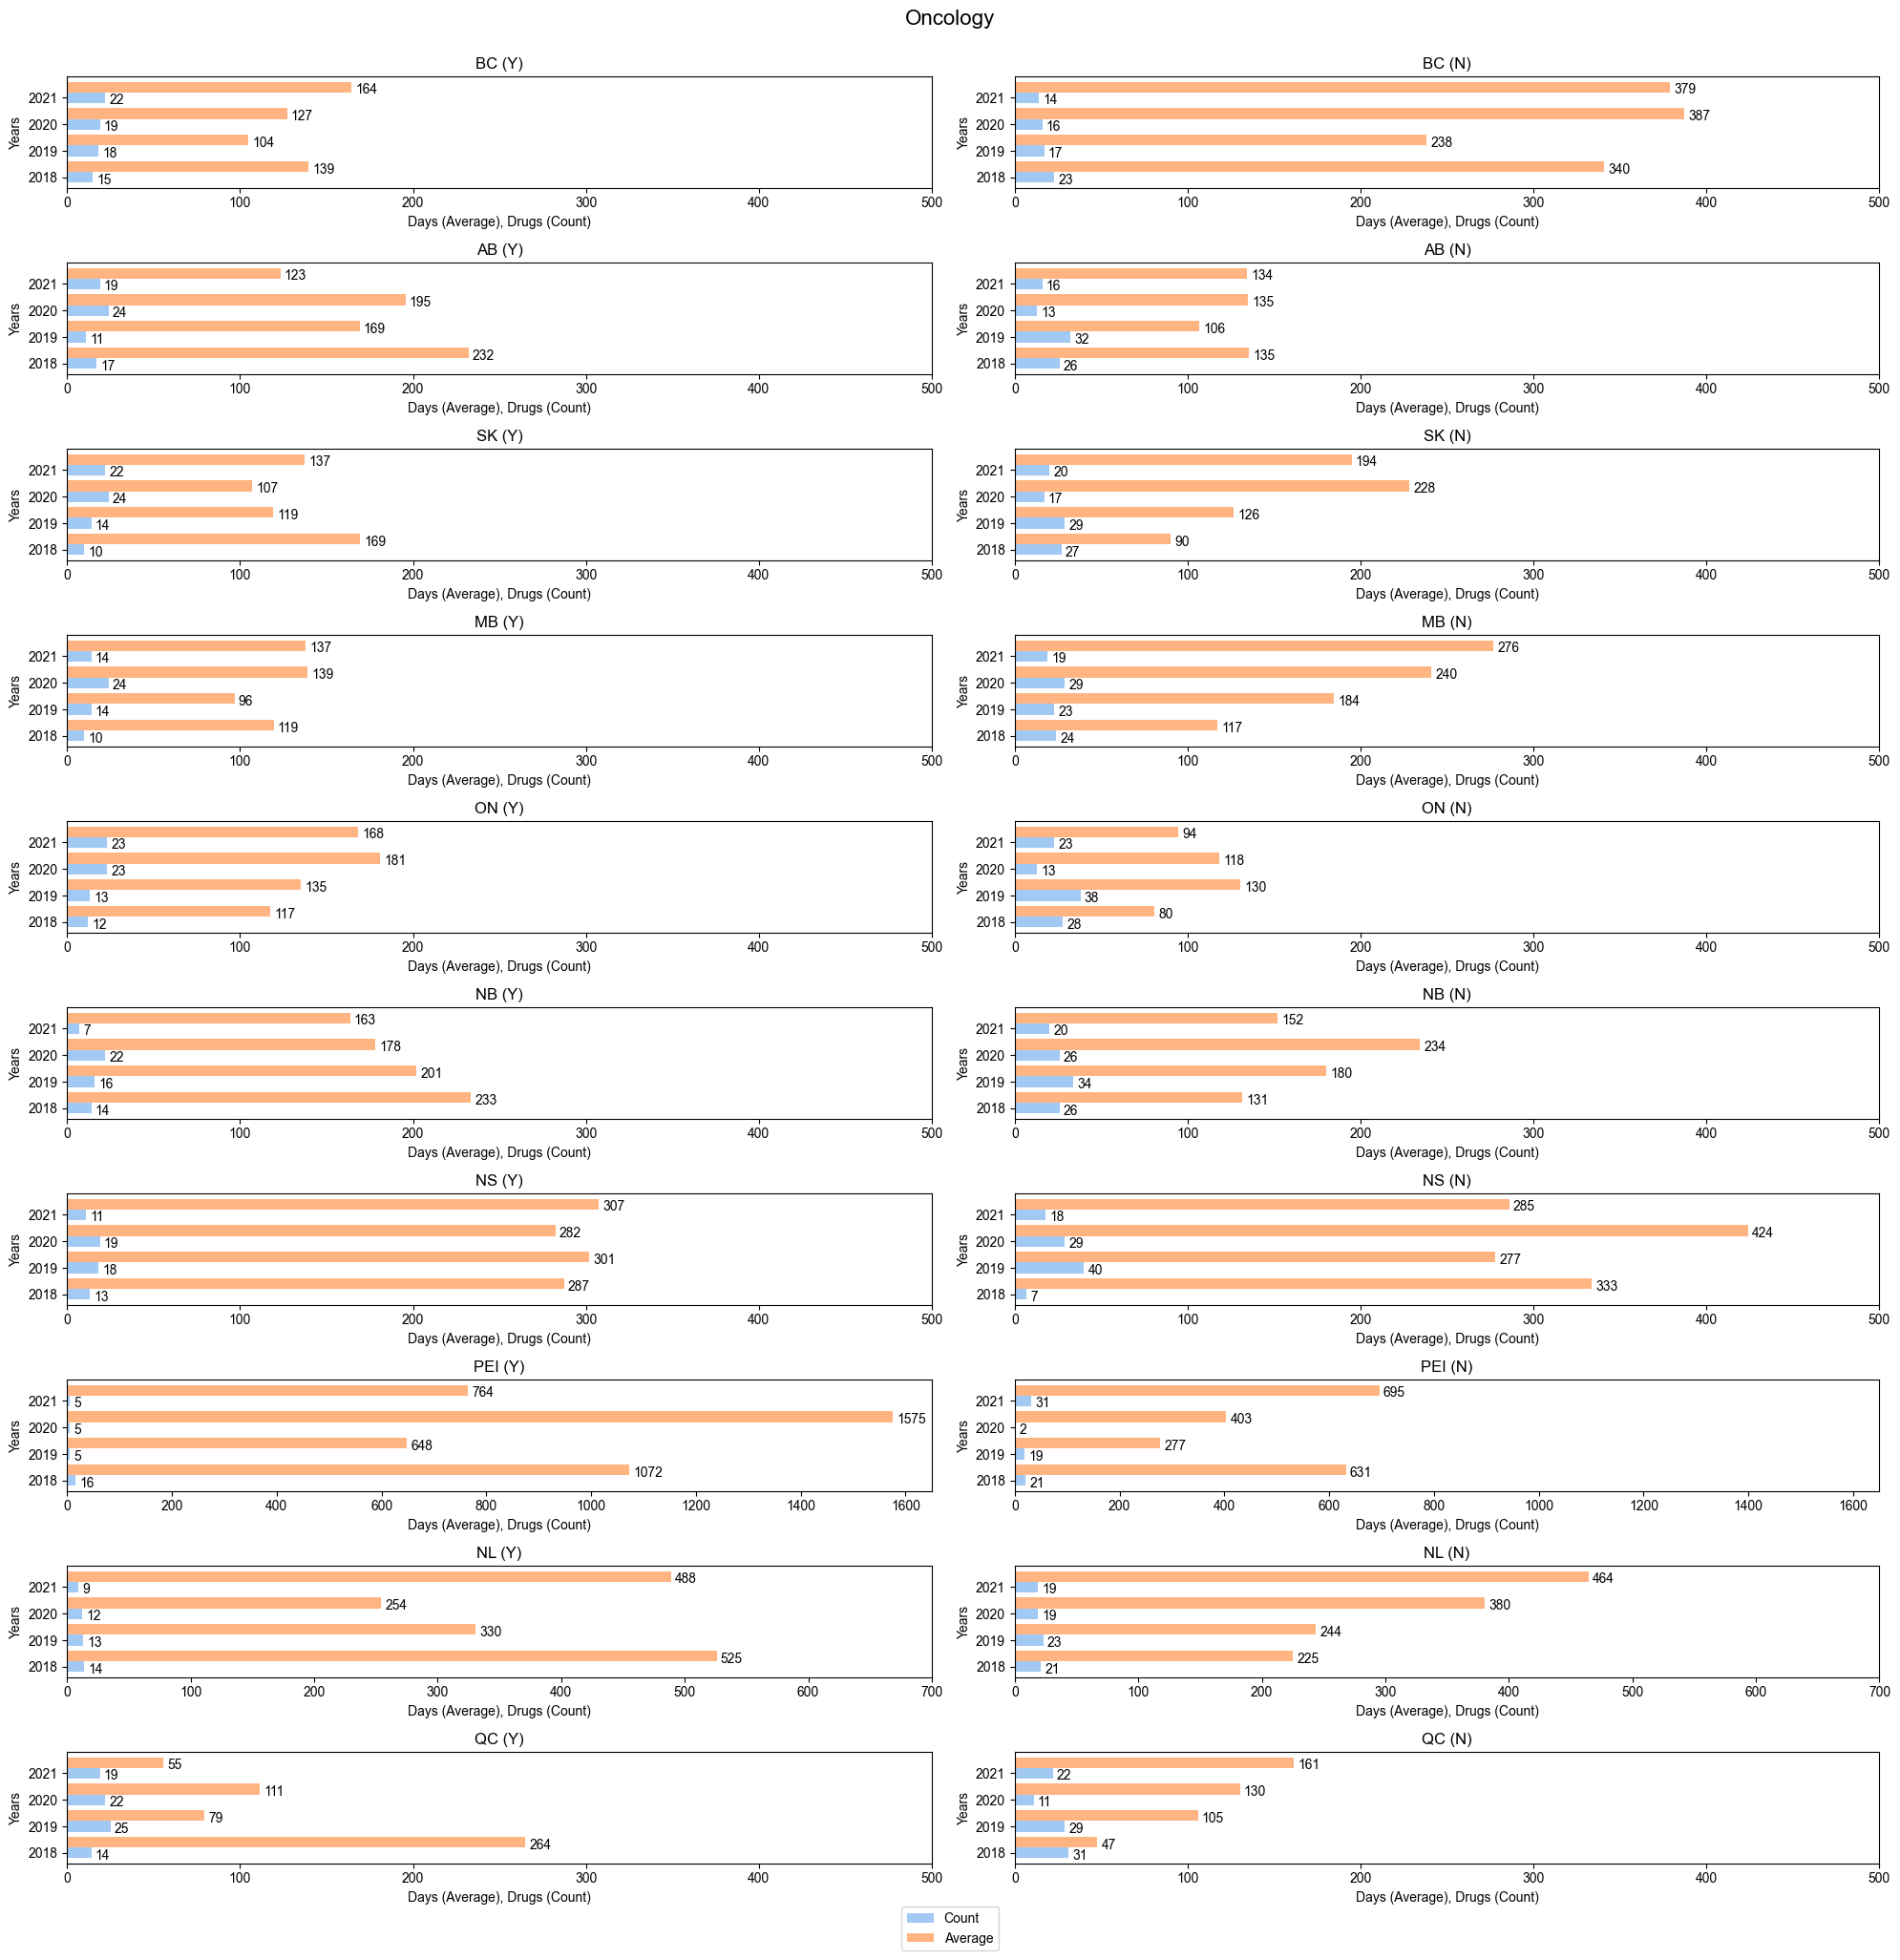

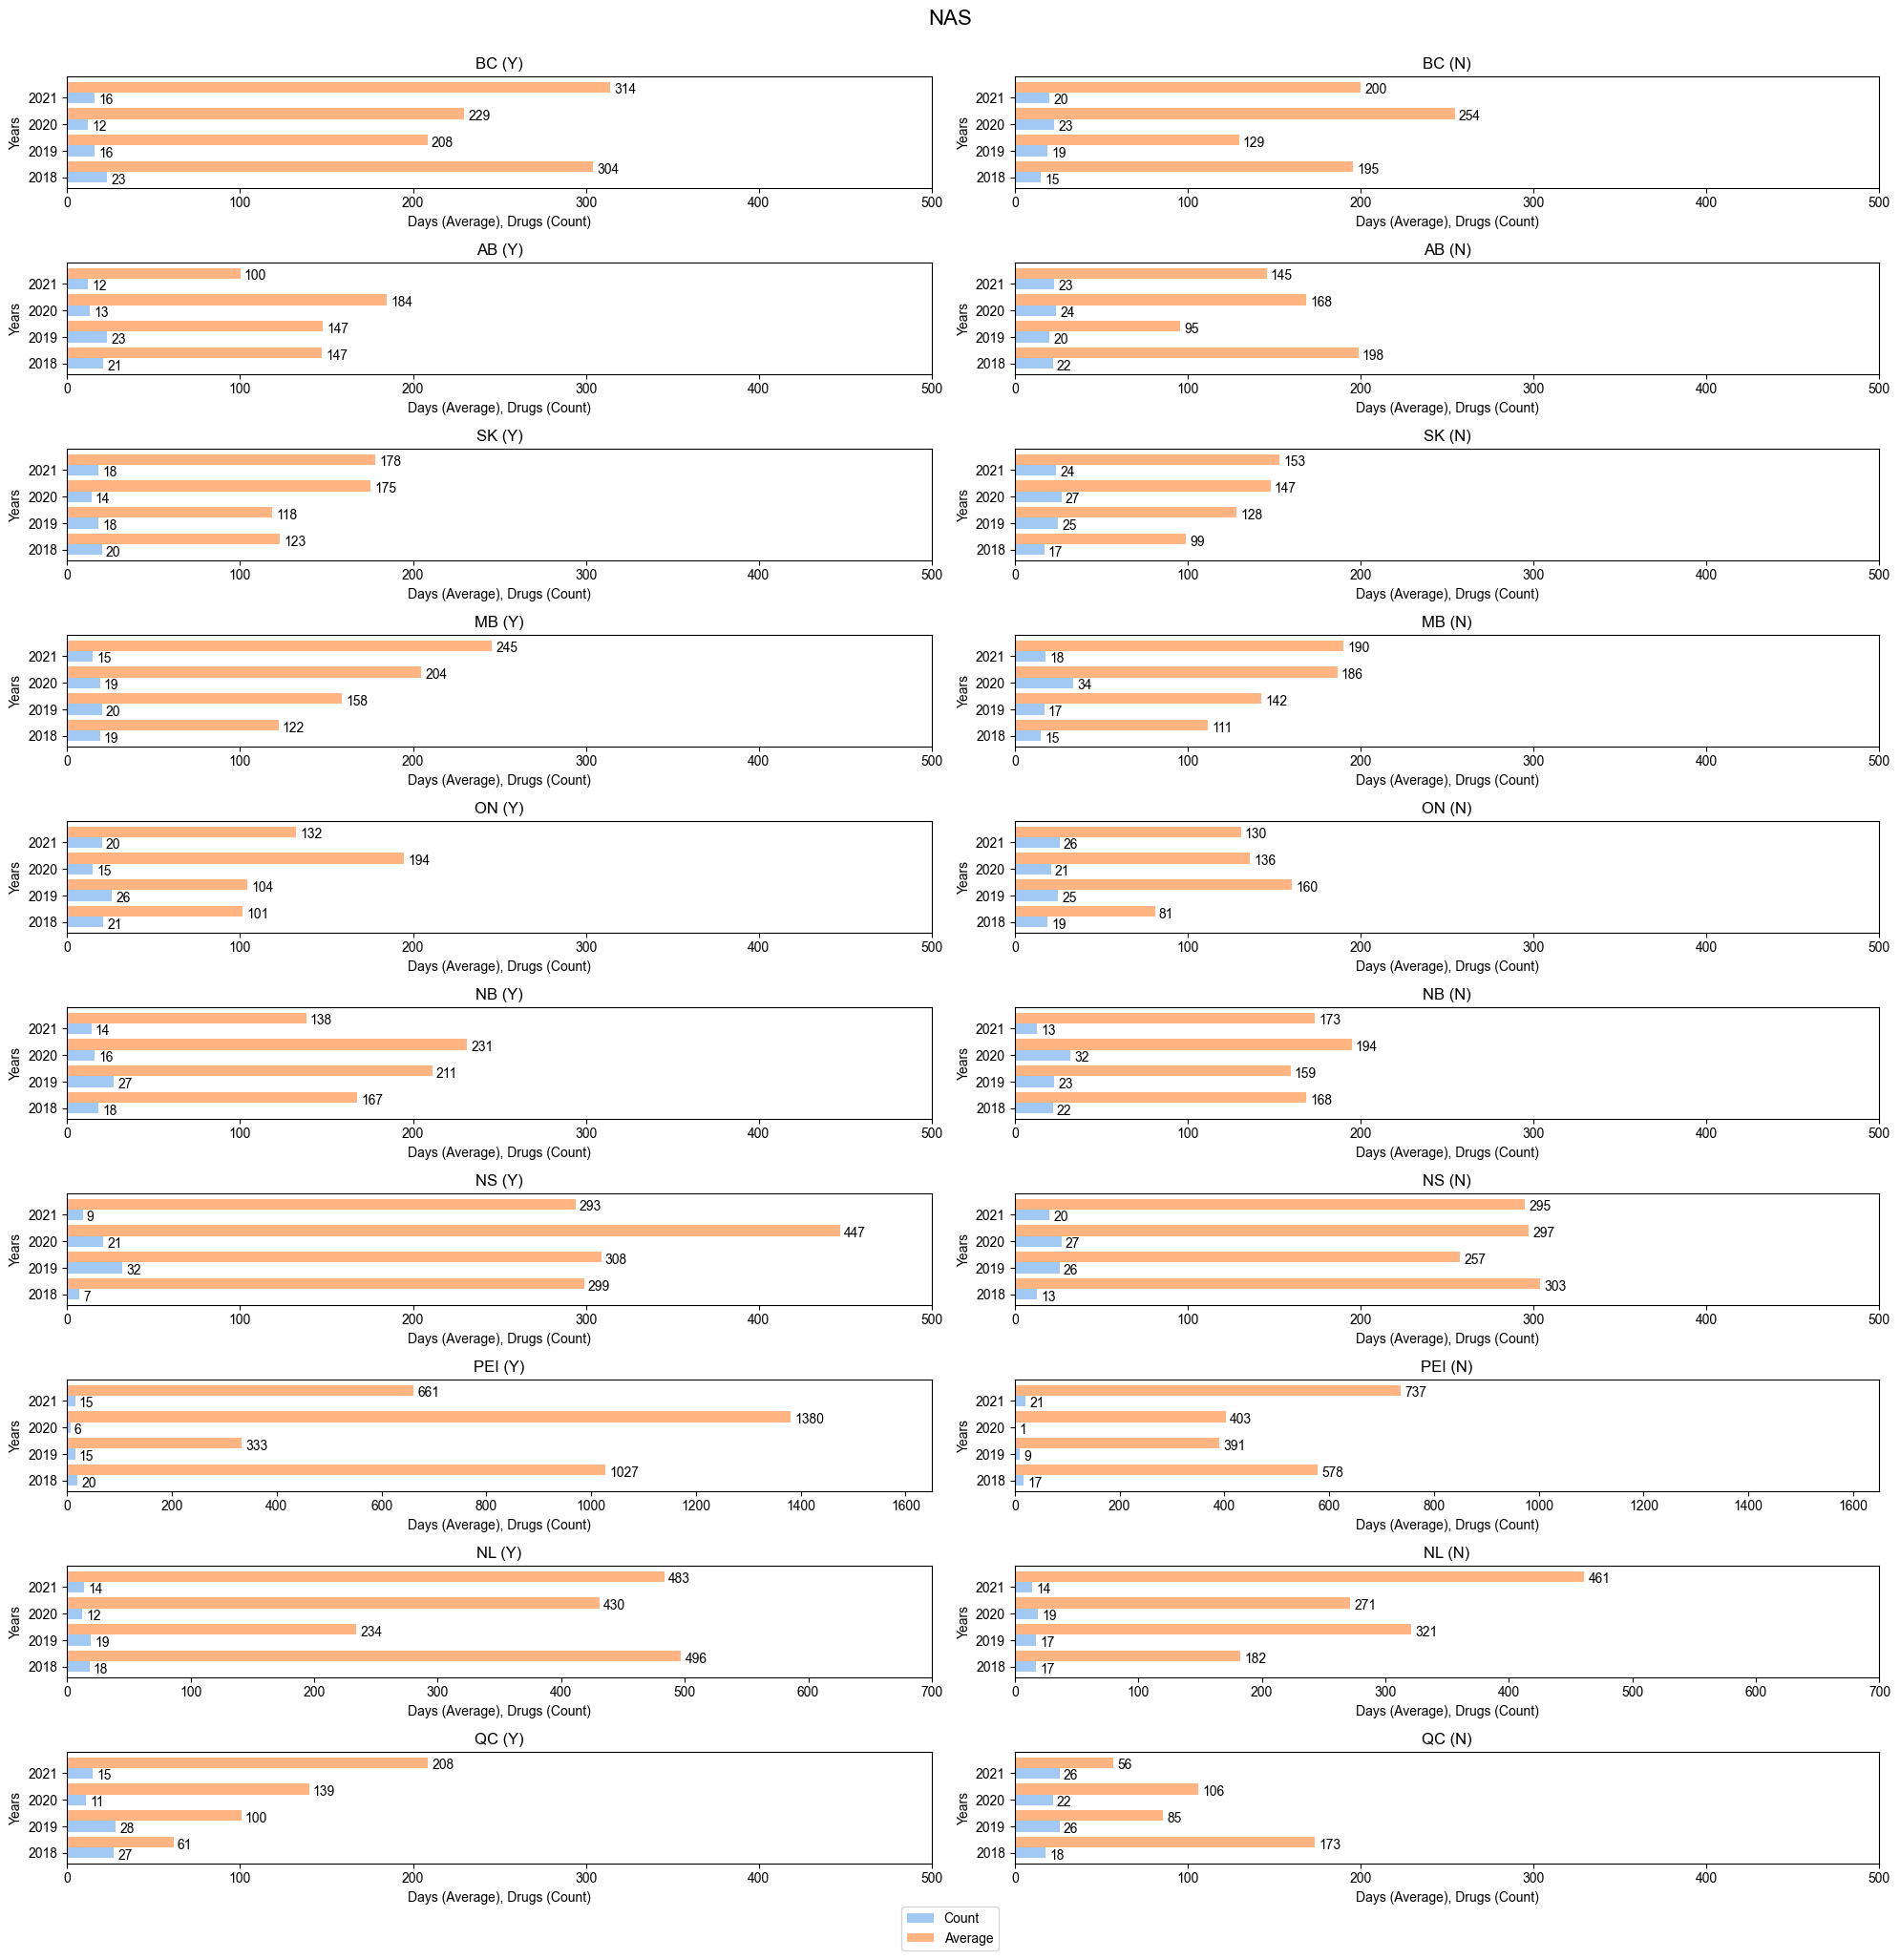

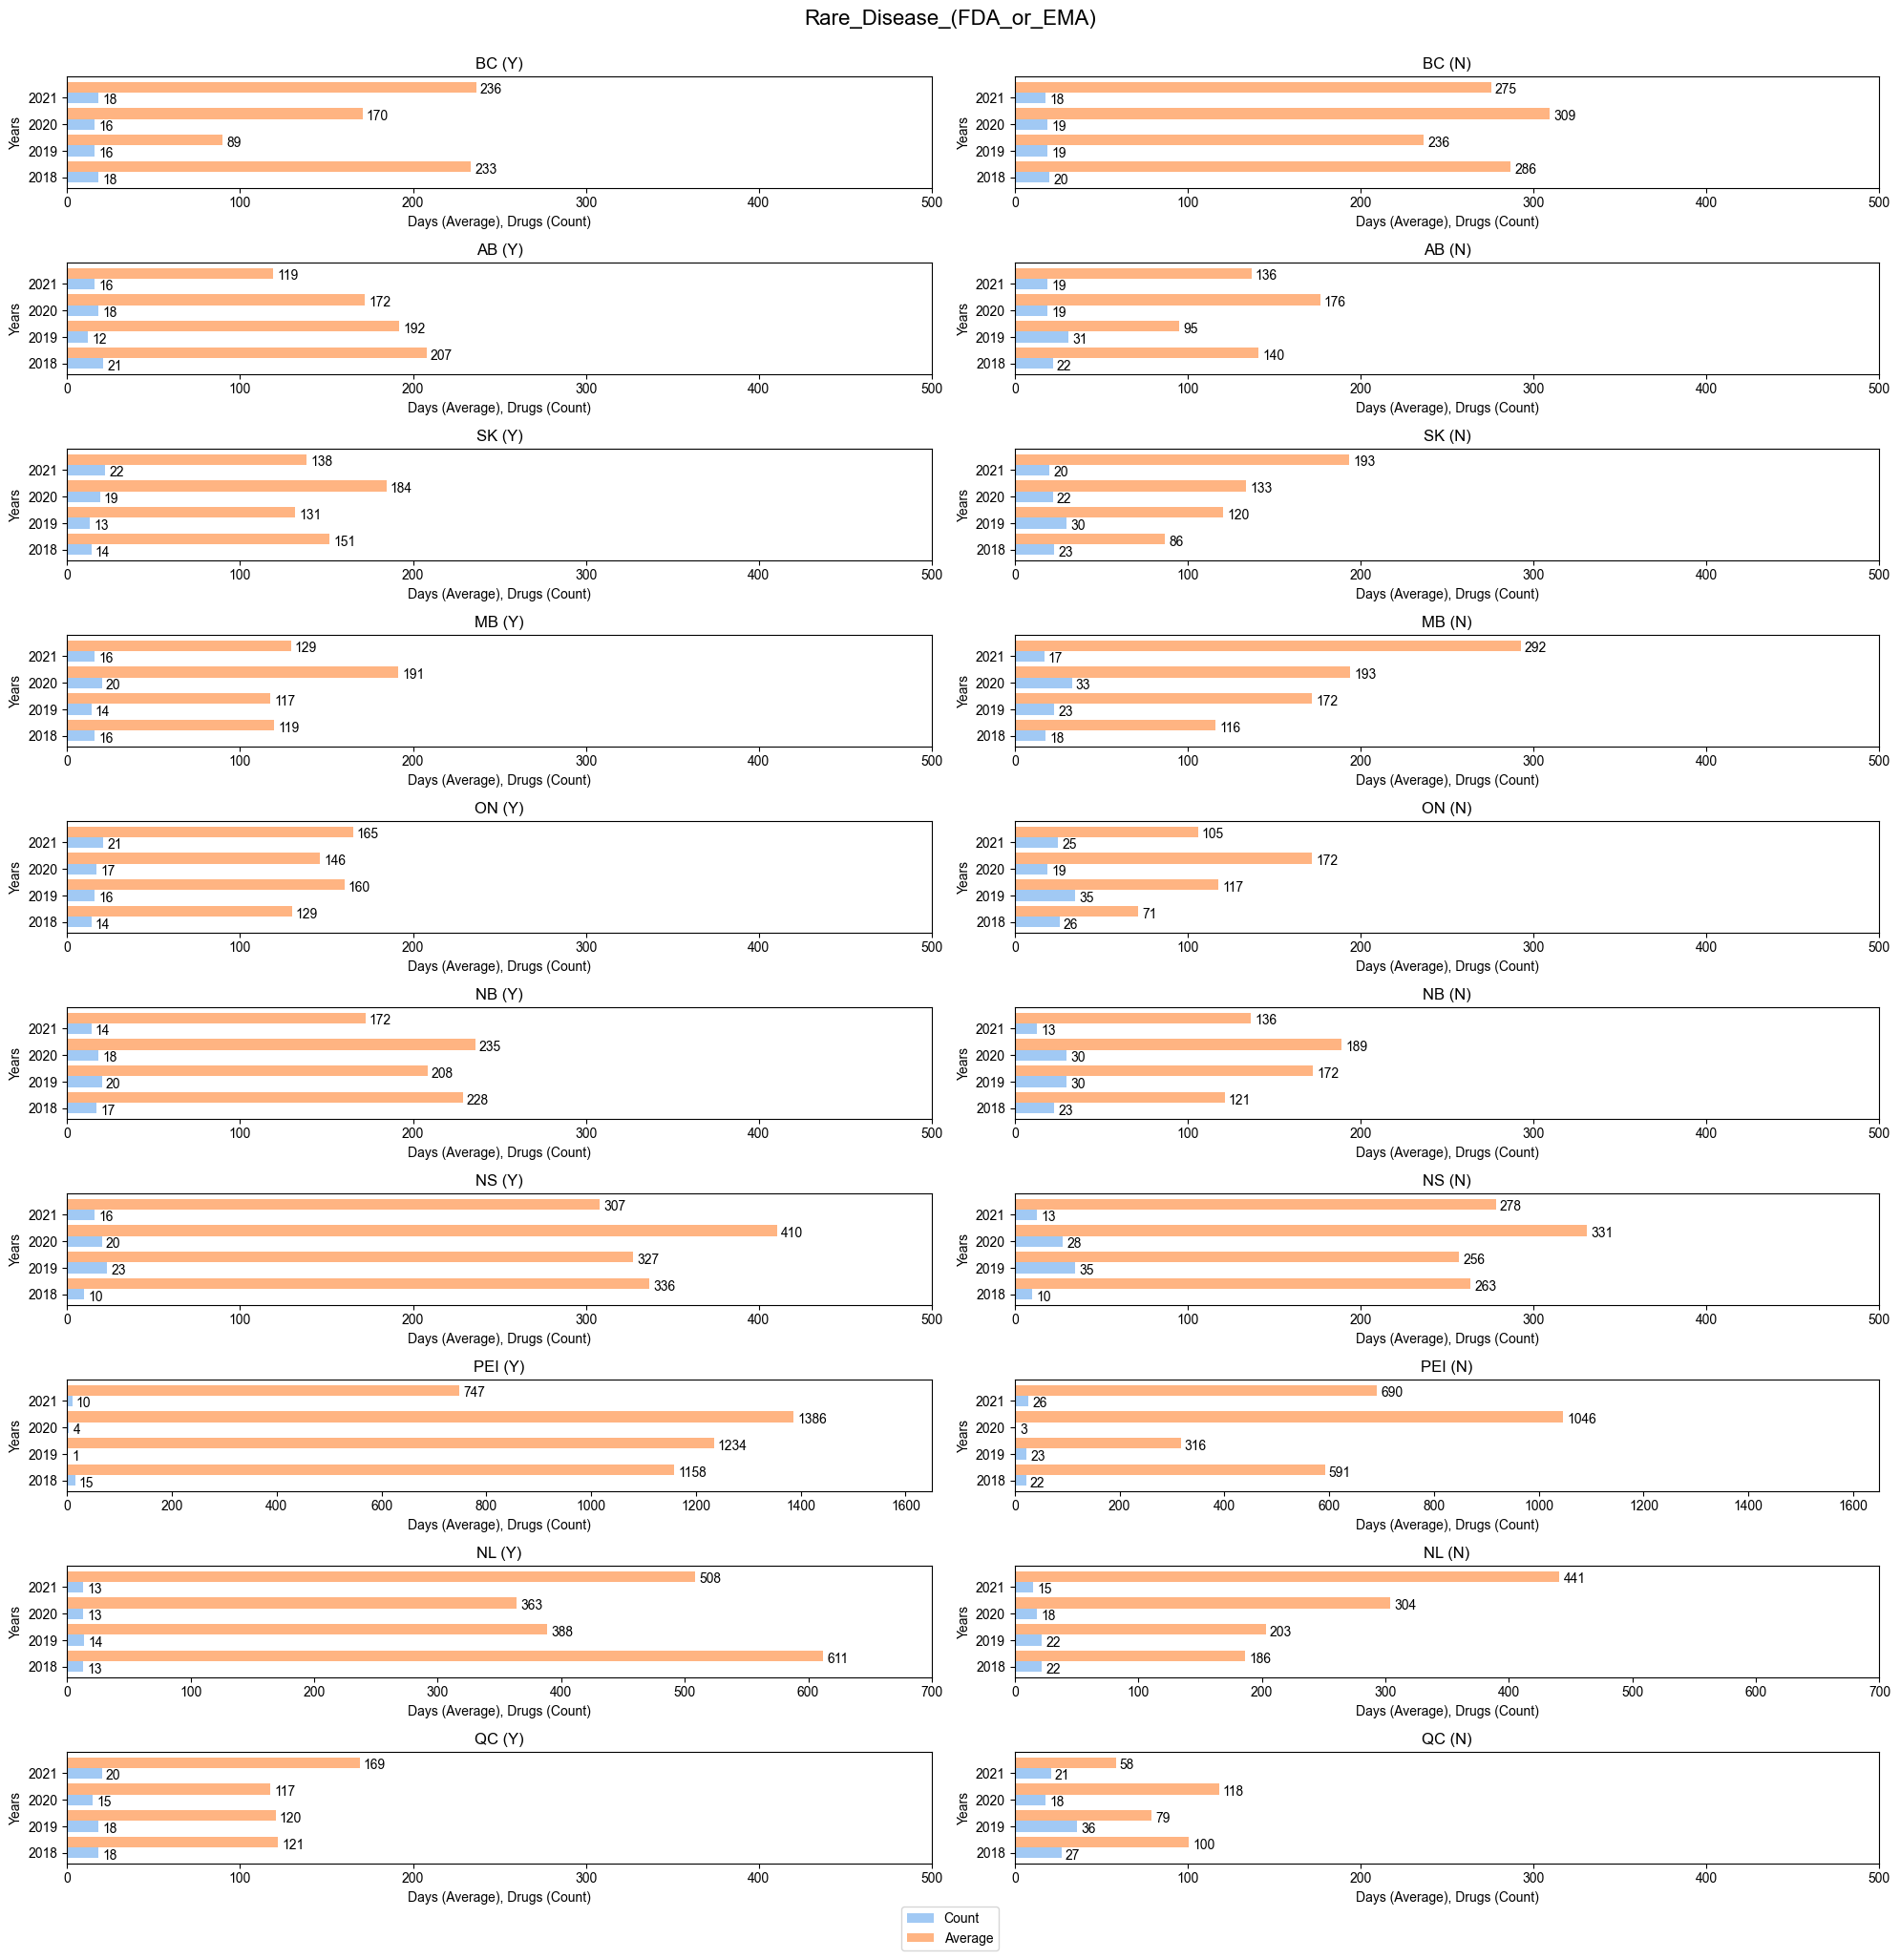

In [26]:
# Sample data and variables
provinces = [
    'BC', 'AB', 'SK', 'MB', 'ON', 'NB', 'NS', 'PEI', 'NL', 'QC'
]

filters = [
    'Oncology', 'NAS', 'Rare_Disease_(FDA_or_EMA)'
]

years = range(2018, 2022)

bar_margin = 0.1 # Adjust this value as needed

# Iterate through filters
for filter_option in filters:
    # Create a 2x10 grid for the subplots (2 rows for Y and N conditions, 10 columns for provinces)
    fig, axs = plt.subplots(nrows=len(provinces), ncols=2, figsize=(20, 20))
    axs = axs.ravel()  # Flatten the 2D array for easier indexing
    
    # Add a title for the current filter option
    fig.suptitle(filter_option, fontsize=16,y=1)

    for j, province in enumerate(provinces):
        for i, condition in enumerate(['Y', 'N']):
            yearly_avg = []
            count = []

            # Calculate yearly average "pCPA to Listing [prov name] Date" and count of "Listing [prov name] Date"
            for year in years:
                year_str = str(year)
                year_data = df_prov_filtered[
                    (df_prov_filtered[filter_option] == condition) &
                    (df_prov_filtered['Listing_' + province + '_Date'].dt.year == year)
                ]

                if not year_data.empty:
                    yearly_avg.append(year_data['pCPA_to_Listing_' + province + '_Date'].mean())
                    count.append(year_data['Listing_' + province + '_Date'].count())
                else:
                    yearly_avg.append(0)
                    count.append(0)

            # Plotting
            ax = axs[j * 2 + i]  # Adjust indexing for the horizontal layout
            width = 0.4  # Width of each bar
            positions = np.arange(len(years))

            count_bars = ax.barh(positions, count, width, label='Count', color=custom_palette[0])
            avg_bars = ax.barh([pos + width for pos in positions], yearly_avg, width, label='Average', color=custom_palette[1])

            # Add numbers to the bars
            for bar in count_bars + avg_bars:
                width = bar.get_width()
                ax.annotate('{}'.format(int(width)),
                            xy=(width, bar.get_y() + bar.get_height() / 2),
                            xytext=(3, -2),  # 3 points horizontal offset
                            textcoords="offset points",
                            ha='left', va='center')

            ax.set_title(f'{province} ({condition})')
            ax.set_yticks(positions)
            ax.set_yticklabels(years)
            ax.set_ylabel('Years')
            ax.set_xlabel('Days (Average), Drugs (Count)')
            
            if province == 'PEI':
                ax.set_xlim(0, 1650)
            elif province == 'NL':
                ax.set_xlim(0, 700)
            else:
                ax.set_xlim(0,500)
            
            # Adjust spacing between bars and axis
            ax.margins(x=bar_margin)

    # Create a single legend
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.02))

    # Adjust spacing between subplots and titles
    plt.subplots_adjust(hspace=0.6, wspace=0.3, top=0.98, bottom=0.03)

    # Export the plot as a PNG file
    plt.savefig(f'{filter_option}_plot.png', bbox_inches='tight')

    # Show the plots for each filter
    plt.tight_layout()
    plt.show()